<a href="https://colab.research.google.com/github/sreeram222/skills-introduction-to-github/blob/main/lungcancerprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
df=pd.read_csv("/content/lung_cancer_examples.csv")
df

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


In [40]:
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [4]:
df.size

413

In [5]:
df.shape

(59, 7)

In [7]:
df.isna().sum()

,0
Name,0
Surname,0
Age,0
Smokes,0
AreaQ,0
Alkhol,0
Result,0


In [28]:
X=df.iloc[:,2:6].values
X
y=df.iloc[:,-1].values
y


array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [33]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)

X_test=sc.transform(X_test)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1]
[1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1]


In [39]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test)*100)

94.44444444444444


In [41]:
knn.predict(sc.transform([[2,1,3,4]]))

array([0])

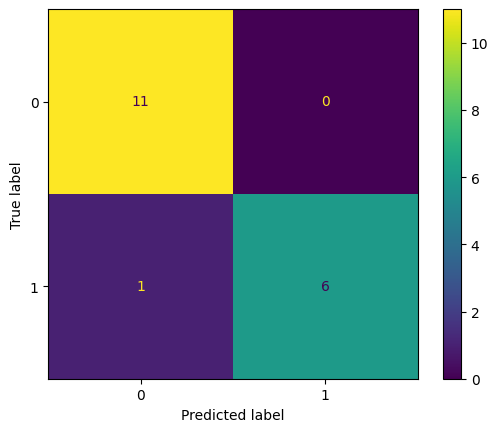

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [44]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[11,  0],
       [ 1,  6]])